# New York City 5 Boroughs Crimes Data

Team:  Brian Gaither, Aurian Ghaemmaghami, Drew Larsen and Sabrina Purvis  


# Business Understanding

The selected dataset documents all reported crimes in the 5 boroughs of New York City up to but excluding murder.  We hope to gather insights related to location, probability and crime type classification.  With these findings, we believe we could make recommendations on police training, shift allocations, and jail/prison capacity.  As you will see below and in further lab submissions, we believe we can find meaningful clusters in time of day, day of week, day of month and possibly even season with relation to crime counts and locations.  Additionally, we plan to classify crime types and utilize that variable.

TODO:  Talk about the direction we're thinking of going with the aggregation and the prediction of crime volumes. 

We are targeting to predict counts of crime, so we will use ASE to measure model effectiveness.  

This data has been gathered from https://www.kaggle.com/adamschroeder/crimes-new-york-city.
  





# Data Meaning

Dataset has 1,048,575  observations with 24 variables.  
  
This dataset has a second file provided that provides each of the 5 borough population metrics by decade from 1950 with projections through 2040.


|Variable Label|Variable Type|Data Description|
| :-|:-|:-|
|CMPLNT_NUM|Continuous|Randomly generated persistent ID for each complaint |
|CMPLNT_FR_DT|Datestamp|	Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)|
|CMPLNT_FR_TM|Timestamp|	Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)|
|CMPLNT_TO_DT|Datestamp|	Ending date of occurrence for the reported event, if exact time of occurrence is unknown|
|CMPLNT_TO_TM|Timestamp|	Ending time of occurrence for the reported event, if exact time of occurrence is unknown|
|RPT_DT|Datestamp|	Date event was reported to police |
|KY_CD|Categorical|	Three digit offense classification code|
|OFNS_DESC	|Categorical (string)|Description of offense corresponding with key code|
|PD_CD	|Categorical|Three digit internal classification code (more granular than Key Code)|
|PD_DESC|Categorical (string)|	Description of internal classification corresponding with PD code (more granular than Offense Description)|
|CRM_ATPT_CPTD_CD|Categorical|	Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely|
|LAW_CAT_CD|Categorical|	Level of offense: felony, misdemeanor, violation |
|JURIS_DESC|Categorical|	Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc.|
|BORO_NM	|Categorical|The name of the borough in which the incident occurred|
|ADDR_PCT_CD	|Categorical|The precinct in which the incident occurred|
|LOC_OF_OCCUR_DESC|Categorical|	Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of|
|PREM_TYP_DESC|Categorical|	Specific description of premises; grocery store, residence, street, etc.|
|PARKS_NM	|Categorical|Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)|
|HADEVELOPT|Categorical|	Name of NYCHA housing development of occurrence, if applicable|
|X_COORD_CD|Continuous|	X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Y_COORD_CD|Continuous|	Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Latitude|Continuous|	Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) |
|Longitude|Continuous|	Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|




#### Weather Data

Weather data was captured from https://www.ncdc.noaa.gov/.  We pulled all weather data from 2010 to 2020 and set the location as Central Park Station.  

While the information available was plentiful, the variables we selected and captured are as described here:

|Variable code|Description|Unit of Measure|
|:-|:-|:-|
|PRCP|Precipitation|Inches|
|SNOW|Snowfall|Inches|
|TMAX|Maximum temperature|Fahrenheit|
|TMIN|Minimum temperature|Fahrenheit|

TODO:  Add Income, Housing and Population data definition

# Data Quality

The data quality of the original raw dataset has been analyzed with key findings outlined below.

In [1]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from folium import plugins
import altair as alt

#load csv
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\FE1_NYPD_Complaint_Data_Historic.csv"
#load Data into Pandas
df = pd.read_csv(file_path)

#load csv
filePath = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\NYPD_Rollup_Joined_All.csv"
#load Data into Pandas
df_Crime = pd.read_csv(filePath)

In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

### Missing Values

Looking at the original raw data, there are several NaNs in the dataframe.  Given most of the data is categorical data, we will not impute these values but rather be selective with the features we include and drop the NaNs. 

We have considered using the mean duration between CMPLNT_FR_TM and CMPLNT_TO_TM to impute the missing CMPLNT_TO_DT and CMPLNT_TP_TM should we determine that doing so will be of value.

The number missing values by column are shown below:

In [2]:
len(df) - df.count()

CMPLNT_NUM                 0
CMPLNT_FR_DT              65
CMPLNT_FR_TM               0
CMPLNT_TO_DT          205959
CMPLNT_TO_TM          205573
RPT_DT                     0
KY_CD                      0
OFNS_DESC               2880
PD_CD                    733
PD_DESC                  733
CRM_ATPT_CPTD_CD           1
LAW_CAT_CD                 0
JURIS_DESC                 0
BORO_NM                    0
ADDR_PCT_CD                1
LOC_OF_OCCUR_DESC     217752
PREM_TYP_DESC           4689
PARKS_NM             1040976
HADEVELOPT            996803
X_COORD_CD             32417
Y_COORD_CD             32417
Latitude               32417
Longitude              32417
Lat_Lon                32417
Start_Dt_Tm               65
End_Dt_Tm             206108
Day_Name                  65
Duration              206159
Duration_to_PD            65
Month                     65
Day                       65
Year                      65
Duration_lbl          257876
Season                    65
Daytime       

### Incorrect Year Entered

We identified 7 records with the incorrect year of 1015 entered instead of 2015.  In this case, we have converted such values to the correct year of 2015.

In [3]:
len(df[(df['CMPLNT_FR_DT'].notnull())&(df['CMPLNT_FR_DT'].str.contains("1015"))])

0

We've determined there are no duplicate records in the raw dataset.  This was checked with the code below.

In [4]:
df_Dupes = df[df.duplicated()]
print(df_Dupes)

Empty DataFrame
Columns: [CMPLNT_NUM, CMPLNT_FR_DT, CMPLNT_FR_TM, CMPLNT_TO_DT, CMPLNT_TO_TM, RPT_DT, KY_CD, OFNS_DESC, PD_CD, PD_DESC, CRM_ATPT_CPTD_CD, LAW_CAT_CD, JURIS_DESC, BORO_NM, ADDR_PCT_CD, LOC_OF_OCCUR_DESC, PREM_TYP_DESC, PARKS_NM, HADEVELOPT, X_COORD_CD, Y_COORD_CD, Latitude, Longitude, Lat_Lon, Start_Dt_Tm, End_Dt_Tm, Day_Name, Duration, Duration_to_PD, Month, Day, Year, Duration_lbl, Season, Daytime, GeoCell, GeoCell_X, GeoCell_Y]
Index: []

[0 rows x 38 columns]


### Outliers
Checking for outliers

# Simple Statistics

Looking at the original raw dataset, we can see that 63% of the data is made up of 6 types of crimes:  Petit Larceny, Harrassment 2, Assault 3 & Related Offenses, Criminal Mischief & Related Offenses, Grand Larceny, and Dangerous Drugs.

In [5]:
import altair as alt
totalRecords = 1048575
df_crime_prop = df.groupby(['OFNS_DESC']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_crime_prop['percent_of_data'] = df_crime_prop['count_cmplnt']/totalRecords

alt.Chart(df_crime_prop).mark_bar().encode(
  x = alt.Y('OFNS_DESC:N', sort='-y'),
  y='percent_of_data:Q',
  tooltip = ['OFNS_DESC', 'percent_of_data']
).properties(width = 800, height = 300, title="Proportion of Crimes in the Dataset")

alt.Chart(...)

As the original data is mostly timestamp and categorical data with the exception of geopositional data such as longitude and latitude, for instance, we have aggregated the data by day to analyze trends in crime volume by day focusing on the top 6 crimes by volume:  Petit Larceny, Harrassment 2, Assault 3 & Related Offenses, Criminal Mischief & Related Offenses, Grand Larceny, and Dangerous Drugs.

TODO:  revisit this topic and rewrite -- not going to limit to top six crimes

### Boxplots of crime volume per day by different dimensions

Below, we've constructed various boxplots to analyze the volume of daily crimes by New York City borough.  We can see that Manhattan has the highest median daily crime volume at 18.5 crimes per day, whereas Staten Island has the lowest median crimes per day at 4.

In [6]:
#take random samples
size = 100        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_smpl = df_Crime.groupby('BORO_NM', as_index=False).apply(fn).reset_index()

alt.Chart(df_smpl).mark_boxplot().encode(
    x='BORO_NM:N',
    y='count_cmplnt:Q'
).properties(width = 500, height = 300,title="Boxplot of Number of Crimes Per Day by Borough")

alt.Chart(...)

By analyzing the volume of daily crimes by season, we can see that both Spring and Summer have the highest median crime rate per day at 8 crimes per day each.  Fall has a mediam daily crime rate of 5 and Winter has a median daily crime rate of 4 crimes per day.

In [7]:
#take random samples
size = 100        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_smpl = df_Crime.groupby('Season', as_index=False).apply(fn).reset_index()

alt.Chart(df_smpl).mark_boxplot().encode(
    x='Season:N',
    y='count_cmplnt:Q'
).properties(width = 500, height = 300,title="Boxplot of Number of Crimes Per Day by Season")

alt.Chart(...)

Analyzing the daily crime rate by Month reveals that June has the highest median daily crime rate at 12.5 crimes per day.  December has the lowest median daily crime rate at 5 crimes per day.

In [8]:
#take random samples
size = 100        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_smpl = df_Crime.groupby('Month', as_index=False).apply(fn).reset_index()

mySort = ["January","February","March","April","May","June","July","August","September","October","November","December"]
alt.Chart(df_smpl).mark_boxplot().encode(
    x= alt.Y('Month:N',sort=mySort),
    y='count_cmplnt:Q'
).properties(width = 500, height = 300,title="Boxplot of Number of Crimes Per Day by Month")

alt.Chart(...)

Using Start Date/Time and End Date/Time to calculate duration of crime. Using this new "Duration" feature, we've created boxplots to analyze any patterns around duration and different categorical variables.  

Below, we can see that Felony has a larger duration than Misdemeanor and Violation.

Text(0.5, 1.0, 'Boxplot of Duration of Crime by Crime Type')

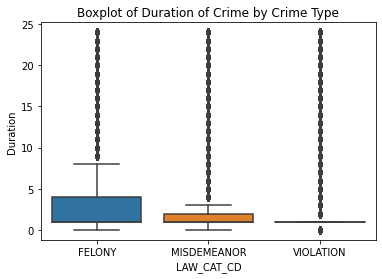

In [9]:
#Duration box plot by crime type
ax = sns.boxplot(x="LAW_CAT_CD", y="Duration", data=df)
ax.set_title("Boxplot of Duration of Crime by Crime Type")

The following boxplot assesses Duration against day time which indicates Morning has a larger spread of duration than other times of day.

Text(0.5, 1.0, 'Boxplot of Duration of Crime by Daytime')

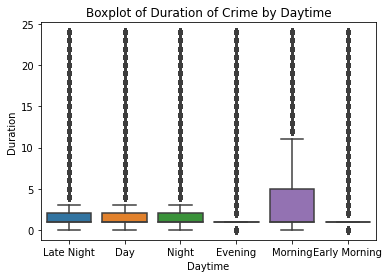

In [17]:
#Duration by time of day
ax = sns.boxplot(x="Daytime", y="Duration", data=df)
ax.set_title("Boxplot of Duration of Crime by Daytime")

Looking at Duration by Borough doesn't reveal a large difference between Boroughs and duration.

Text(0.5, 1.0, 'Boxplot of Duration of Crime by Borough')

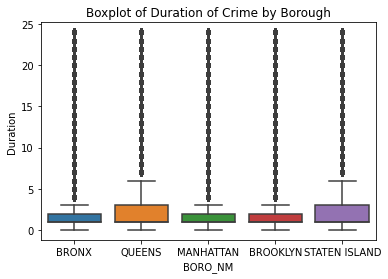

In [18]:
#Duration by Borough
ax = sns.boxplot(x="BORO_NM", y="Duration", data=df)
ax.set_title("Boxplot of Duration of Crime by Borough")

Looking at duration by offense description reveals that certain crimes have a larger median duration.  For instance, Grand Larceny of Motor Vehicle has a median duration of 12 hours compared to other crimes which have a median duration of 1-2 hours.

In [19]:
#take random samples by OFNS_DESC for box plot
size = 25        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_smpl = df.groupby('OFNS_DESC', as_index=False).apply(fn).reset_index()

alt.Chart(df_smpl).mark_boxplot().encode(
    x='OFNS_DESC:N',
    y='Duration:Q'
).properties(title="Boxplot of Duration for each Offense Description")

alt.Chart(...)

# Visualize Attributes

### Density / Heatmap plots

In [10]:
#Code source: https://medium.com/@madhuramiah/geographic-plotting-with-python-folium-2f235cc167b7

import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from folium import plugins

%matplotlib inline

In [11]:
#first, we have to define the count bins by the various offenses.  I determined in this step that I would only include n>25 
#but this can be amended to drop the threshold down as I defined the bins down to five. colors and bin sizes can also be modified
location=df.groupby(['Latitude','Longitude','OFNS_DESC']).size().reset_index(name='count').sort_values(by='count',ascending=False)

location=location[location['count']>25]

location['color']=location['count'].apply(lambda count:"Black" if count>=400 else
                                         "green" if count>=200 and count<400 else
                                         "Orange" if count>=100 and count<200 else
                                         "darkblue" if count>=50 and count<100 else
                                         "red" if count>=25 and count<50 else
                                         "lightblue" if count>=10 and count<25 else
                                         "brown" if count>=5 and count<10 else
                                         "grey")

location['size']=location['count'].apply(lambda count:12 if count>=400 else
                                         10 if count>=200 and count<400 else
                                         8 if count>=100 and count<200 else
                                         6 if count>=50 and count<100 else
                                         4 if count>=25 and count<50 else
                                         2 if count>=10 and count<25 else
                                         1 if count>=5 and count<10 else
                                         0.1)

location

Latitude  Longitude                       OFNS_DESC  count  color  \
263120  40.750431 -73.989282                   PETIT LARCENY   2467  Black   
307336  40.791152 -73.884372  OFFENSES AGAINST PUBLIC ADMINI   1091  Black   
238373  40.733927 -73.871582                   PETIT LARCENY    997  Black   
203623  40.710094 -74.010610                   PETIT LARCENY    984  Black   
307328  40.791152 -73.884372                  FELONY ASSAULT    926  Black   
...           ...        ...                             ...    ...    ...   
315540  40.804046 -73.936620                   HARRASSMENT 2     26    red   
326036  40.814712 -73.942275                   HARRASSMENT 2     26    red   
40540   40.614782 -74.083046                   HARRASSMENT 2     26    red   
153600  40.685352 -73.919076                   HARRASSMENT 2     26    red   
364326  40.841182 -73.942674                   PETIT LARCENY     26    red   

        size  
263120    12  
307336    12  
238373    12  
203623    12  
307328    12  
...      ...  
315540     4  
326036     4  
40540      4  
153600     4  
364326     4  

[1888 rows x 6 columns]

TODO: Descibe the chart takeaway

In [20]:
#we have to define the center of the map first, to base the map from
m=folium.Map([40.738, -73.98],zoom_start=11)

#location=location[0:2000]

for lat,lon,area,color,count,size in zip(location['Latitude'],location['Longitude'],location['OFNS_DESC'],location['color'],
                                         location['count'],location['size']):

     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=size,
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(m)

#Map is saved to file
m.save('Crime_Map.html')
m

TODO: Descibe the chart takeaway

In [13]:
#Next, adding a heatmap element to the map
# convert to (n, 2) nd-array format for heatmap

location1=location[0:1326]
location_data = location[['Latitude', 'Longitude']]

# plot heatmap

m.add_child(plugins.HeatMap(location_data, radius=15))
m.save('heatmap.html')
m

# Explore Joint Attributes

TODO: Andrew will add his findings

# Explore Attributes and Class

TODO: Andrew will add his findings

# New Features

As mentioned previously, our original dataset was somewhat limited as most of the features are categoricals and timestamps with some geospatial data such as longitude and latitude as well as x and y coordinates.  Therefore, we've identified external datasets as well as developed new features from the original dataset attributes to help enhance our data. 

Several new features have been created from the original data set by:
- Cutting the date into Day, Day of Week, Month, Year and Season
- We've also converted the Day and Month into encoded values for correlation analysis
- Creating a new "GeoCell" feature that groups nearby x and y coordinates together by cutting the x & y grid into 100 equal cells
- Calculating the duration between Start date/time and End date/time
- Cutting the time of day and day of week from the Start Date and Start Time
- Calculating the number of complaints per day and per time of day into a feature called "count_complaint"

New external data has been joined with our original data set to give us:
- per capita income by borough
- housing pricing by borough
- weather data by day including precipitation and snow
- population data by borough

# Exceptional Work

Using the new Daytime and Day_Name features, we can visualizae when crimes are occurring most often throughout the week.  Below, we can see that crimes most often occur in the evening and night and between Tuesday and Friday of the week.

In [14]:
#load csv
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\TOD_DOW.csv"
#load Data into Pandas
df_TOD_DOW = pd.read_csv(file_path)

daySort = ["Monday","Tuesday","Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
timeSort = ["Early Morning", "Morning", "Day", "Evening", "Night", "Late Night"]

alt.Chart(df_TOD_DOW).mark_rect().encode(
    x = alt.Y('Day_Name:N', sort=daySort),
    y= alt.Y('Daytime:N',sort=timeSort),
    color='count_cmplnt:Q',
  tooltip = ['Day_Name', 'count_cmplnt','Daytime']
).properties(title="Crimes volumes by Time of Day and Day of Week")

alt.Chart(...)

Using the new "GeoCell" feature, we can visualize where on the map we have higher densities of crimes without being constrained by Borough or neighborhood boundaries.  Each x y coordinate maps to a cell.

In [15]:
#load csv
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\x_y_cell.csv"
#load Data into Pandas
df_x_y = pd.read_csv(file_path)

myXSort = ["1","2","3","4","5","6","7","8","9","10"]
myYSort = [10,9,8,7,6,5,4,3,2,1]

alt.Chart(df_x_y).mark_rect().encode(
    x = alt.X('GeoCell_X:O', sort=myXSort),
    y=alt.Y('GeoCell_Y:O', sort=myYSort),
    color='count_cmplnt:Q',
  tooltip = ['GeoCell_X', 'GeoCell_Y','count_cmplnt']
).properties(title="Crimes volumes by GeoCell")

alt.Chart(...)